# Proyecto: Introducción a los Sistemas Inteligentes 2022-I
## Clasificación de Canciones en Géneros Musicales
<ul>
<li><h4>Santiago Acosta Meza</h4></li>
</ul>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

def normalize(df):
    return (df-df.min())/(df.max()-df.min())

# Partición de los Datos

En clase se discutio la posibilidad de eliminar la clase "Children’s Music" debido a su baja frecuencia.

Asimismo, mientras se buscan los hiperparametros, se realizara undersampling de las clases mayoritarias para lograr el balance de clases. Al finalizar el undersampling, se cuenta con 100.000 observaciones aproximadamente para 24 clases totales.

(99624, 14)
(99624,)


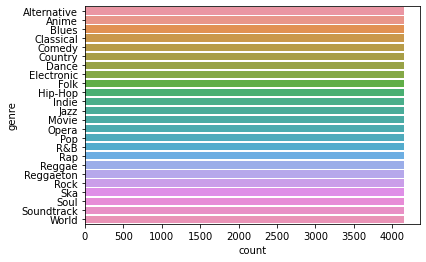

In [ ]:
df = pd.read_csv("cleanSpotifyFeatureWithRandomDuplicate.csv")

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df[df['genre']!='Children’s Music']

X = df.drop(columns=['genre'])
y = df['genre']

under_sampler = RandomUnderSampler(random_state=42)
X, y = under_sampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=11,
                                                    stratify=y)

normalized_X_train = normalize(X_train)
normalized_X_test = normalize(X_test)

tempDf = pd.concat([X,y])

print(X.shape)
print(y.shape)

sn.countplot(y=y, data=tempDf)

In [ ]:
classes = np.array(y.unique())
print(X.shape)

(99624, 14)


# Grid Search
### K-neighbors
Aplicación de grid search a clasificador k-vecinos

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores parametros {'n_neighbors': 63}
Mejor calificacion 0.37722272027030757
              precision    recall  f1-score   support

 Alternative       0.28      0.27      0.27      1245
       Anime       0.44      0.27      0.33      1246
       Blues       0.33      0.20      0.25      1245
   Classical       0.50      0.46      0.48      1245
      Comedy       0.94      0.93      0.94      1245
     Country       0.23      0.45      0.30      1245
       Dance       0.21      0.26      0.23      1245
  Electronic       0.42      0.46      0.44      1246
        Folk       0.23      0.29      0.26      1245
     Hip-Hop       0.31      0.39      0.34      1245
       Indie       0.16      0.07      0.10      1245
        Jazz       0.31      0.29      0.30      1245
       Movie       0.68      0.39      0.50      1246
       Opera       0.57      0.83      0.67      1246
         Pop       0.38      0.29      0.33      12

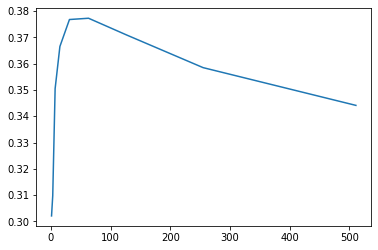

In [ ]:
grid = [i for i in range(1, 10)]
param_grid = {'n_neighbors': [2**i-1 for i in grid]}

param_grid

clf = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, verbose=1, return_train_score=True)
clf.fit(normalized_X_train, y_train)

cv_results = pd.DataFrame(clf.cv_results_)
cv_results = cv_results[['param_n_neighbors', 'mean_test_score']]
n_neighbors = cv_results['param_n_neighbors']
cv_results.sort_values(by='mean_test_score', ascending=False).head(9)
mean_test_score_train = cv_results['mean_test_score']

plt.plot(param_grid['n_neighbors'], mean_test_score_train)

print('Mejores parametros', clf.best_params_)
print('Mejor calificacion', clf.best_score_)

preds=clf.best_estimator_.predict(normalized_X_test)
print(classification_report(y_test, preds))

print("Entrenamiento", clf.score(normalized_X_train, y_train))
print("Validacion", clf.score(normalized_X_test, y_test))

## Conclusión

Con 31 y 63 vecinos se obtienen resultados similares, por lo cual se escogera el modelo que considera 31 vecinos debido a su menor complejidad.

### K-neighbors
K = 31

Training_score = 0.41

Test_score = 0.36

<hr></hr>

# Grid Search
### Logistic Regression
Aplicación de grid search a clasificador Logistic Regression

In [ ]:
def normalize(df):
    return (df-df.min())/(df.max()-df.min())

normalized_X_train = normalize(X_train)
normalized_X_test = normalize(X_test)

In [ ]:
param_grid = {'multi_class': ['ovr', 'multinomial']}

clf = GridSearchCV(LogisticRegression(max_iter=100), param_grid=param_grid, verbose=1, return_train_score=True)
clf.fit(normalized_X_train, y_train)

In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results = cv_results[['param_multi_class', 'mean_test_score']]

multi_class = cv_results['param_multi_class']
mean_test_score_train = cv_results['mean_test_score']

print('Mejores Parametros', clf.best_params_)
print('Mejor Puntaje de Entrenamiento', clf.best_score_)
print('Puntaje de Validación', clf.score(normalized_X_test, y_test))

Mejores Parametros {'multi_class': 'multinomial'}
Mejor Puntaje de Entrenamiento 0.40746529083256294
Puntaje de Validación 0.40330567451820126


## Conclusión
### Logistic Regresssion

Se hizo el entrenamiento con y sin normalización; De esta manera, el entrenamiento con normalización dio mejores resultados. 

Asimismo, se consideró la estrategia multi-clase que se debía tomar para la discriminación de datos mediante Grid Search. La estrategia multinomial fue la que mejores resultados arrojo.

**Con Normalización**

multi_class = 'multinomial'

Training_score = 0.41

Test_score = 0.40

<hr></hr>

# Grid Search
### Arbol de Desición
Aplicación de grid search a clasificador Arbol de Desición

In [ ]:
grid = [i for i in range(1, 12)]
# param_grid = {'max_depth':[2**i for i in grid], 'max_leaf_nodes':[2**i for i in grid] 'criterion': ['gini', 'entropy']}
param_grid = {'max_depth':[2**i for i in grid], 'max_leaf_nodes':[2**i for i in grid]}

clf = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid=param_grid, verbose=1, return_train_score=True)
clf.fit(X_train, y_train)

cv_results = pd.DataFrame(clf.cv_results_)

cv_results = cv_results[['param_max_depth','param_max_leaf_nodes',  'mean_test_score']]

max_depth = cv_results['param_max_depth']
max_leaf_nodes = cv_results['param_max_leaf_nodes']
mean_test_score_train = cv_results['mean_test_score']

print('Mejores Parametros', clf.best_params_)
print('Mejor Puntaje de Entrenamiento', clf.best_score_)
print('Puntaje de Validación', clf.score(X_test, y_test))

Fitting 5 folds for each of 121 candidates, totalling 605 fits
Mejores Parametros {'max_depth': 16, 'max_leaf_nodes': 1024}
Mejor Puntaje de Entrenamiento 0.40793846050276483
Puntaje de Validación 0.4131423982869379


## Conclusión

Se considerarón diferentes criterios, profundidades maximas y cantidad maxima de nodos hoja, mediante Grid Search

### Arbol de Desición
criterion = 'entropy'

max_depth = 16

max_leaf_nodes = 512

Training_score = 0.39

Test_score = 0.39

<hr></hr>

# Grid Search
### Naive Bayes
Aplicación de grid search a clasificador Naive Bayes

In [ ]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

clf = GridSearchCV(GaussianNB(), param_grid=params_NB, verbose=1, return_train_score=True)
clf.fit(X_train, y_train)

cv_results = pd.DataFrame(clf.cv_results_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
cv_results = cv_results[['param_var_smoothing',  'mean_test_score']]

var_smoothing = cv_results['param_var_smoothing']
mean_test_score_train = cv_results['mean_test_score']

print('Mejores Parametros', clf.best_params_)
print('Mejor Puntaje de Entrenamiento', clf.best_score_)
print('Puntaje de Validación', clf.score(X_test, y_test))

Mejores Parametros {'var_smoothing': 1e-09}
Mejor Puntaje de Entrenamiento 0.24971321642099187
Puntaje de Validación 0.25016729122055675


## Conclusión

Se busca el mejor valor para el híper parámetro "var_smoothing" del clasificador Bayesiano, mediante Grid Search.

### Naive Bayes
var_smoothing = 1e-09

Training_score = 0.25

Test_score = 0.25

<hr></hr>

# Grid Search
### Random Forest
Aplicación de grid search a clasificador Random Forest

In [ ]:
grid = [i for i in range(1, 15)]
# param_grid = {'n_estimators':[64*2*i for i in grid], 'max_samples':[48*2*i for i in grid], 'max_features':[3*2*i for i in grid]}
# param_grid = {'n_estimators':[50*(5+i) for i in grid], 'max_samples':[50*(4+i) for i in grid]}
param_grid = {'max_features':[i for i in grid]}

clf = GridSearchCV(BaggingClassifier(max_samples=192, n_estimators=256), param_grid=param_grid, verbose=1, return_train_score=True)
clf.fit(X_train, y_train)

cv_results = pd.DataFrame(clf.cv_results_)

cv_results = cv_results[['mean_test_score']]

mean_test_score_train = cv_results['mean_test_score']

print('Mejores Parametros', clf.best_params_)
print('Mejor Puntaje de Entrenamiento', clf.best_score_)
print('Puntaje de Validación', clf.score(X_test, y_test))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Mejores Parametros {'max_features': 11}
Mejor Puntaje de Entrenamiento 0.4330044499035422
Puntaje de Validación 0.43816916488222696


## Conclusión

Se estudiaron los híper parámetros "max_samples" y "max_features", pero no tenían incidencia en el rendimiento del clasificador.

Finalmente, se estudió el valor de "max_features" y se obtuvo que 11 era el mejor valor para este híper parámetro.

### Random Forest
max_features = 11

Training_score = 0.43

Test_score = 0.44

<hr></hr>

******
******
******

# Importancia de Atributos

Ahora se va a estudiar la importancia de los parámetros para el clasificador de árbol de decisión, con el propósito de eliminar los parámetros poco importantes.

In [ ]:
criterion = 'entropy'
max_depth = 16
max_leaf_nodes = 512

treeClassifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
treeClassifier.fit(X_train, y_train)

treeClassifier.score(X_test, y_test)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': treeClassifier.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

print(importances)

           Attribute  Importance
0         popularity    0.442035
1       acousticness    0.132093
10       speechiness    0.121803
5   instrumentalness    0.087696
2       danceability    0.073330
8           loudness    0.044832
4             energy    0.032285
13           valence    0.031790
3        duration_ms    0.028879
11             tempo    0.002831
9               mode    0.001530
7           liveness    0.000896
6                key    0.000000
12    time_signature    0.000000


In [ ]:
preds=treeClassifier.predict(X_test)
confMatrix = confusion_matrix(y_test, preds)

print(classification_report(y_test, preds))

# sn.heatmap(confMatrix)
# print(pd.DataFrame(confMatrix) )

              precision    recall  f1-score   support

 Alternative       0.34      0.26      0.30      1245
       Anime       0.54      0.46      0.49      1246
       Blues       0.32      0.30      0.31      1245
   Classical       0.58      0.59      0.58      1245
      Comedy       0.95      0.91      0.93      1245
     Country       0.32      0.38      0.35      1245
       Dance       0.19      0.20      0.20      1245
  Electronic       0.42      0.42      0.42      1246
        Folk       0.28      0.32      0.30      1245
     Hip-Hop       0.29      0.37      0.33      1245
       Indie       0.21      0.14      0.16      1245
        Jazz       0.31      0.33      0.32      1245
       Movie       0.65      0.53      0.59      1246
       Opera       0.69      0.89      0.78      1246
         Pop       0.33      0.55      0.41      1245
         R&B       0.25      0.23      0.24      1245
         Rap       0.27      0.25      0.26      1246
      Reggae       0.34    

<hr>

# Eliminación de Features poco importantes

Se eliminan las features con importancia menor al 0.1%

In [ ]:
new_X_train = X_train.drop(columns=['time_signature', 'key', 'liveness', 'mode', 'tempo'])
new_X_test = X_test.drop(columns=['time_signature', 'key', 'liveness', 'mode', 'tempo'])

In [ ]:
criterion = 'entropy'
max_depth = 16
max_leaf_nodes = 512

treeClassifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
treeClassifier.fit(new_X_train, y_train)

print(treeClassifier.score(new_X_test, y_test))

importances = pd.DataFrame(data={
    'Attribute': new_X_train.columns,
    'Importance': treeClassifier.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

print(importances)

0.40892665952890794
          Attribute  Importance
0        popularity    0.442822
1      acousticness    0.133125
7       speechiness    0.122828
5  instrumentalness    0.088503
2      danceability    0.073584
6          loudness    0.045116
4            energy    0.032745
8           valence    0.032118
3       duration_ms    0.029159
